<a href="https://colab.research.google.com/github/mimiflynn/covid-data/blob/master/covid_jhu_csse.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# !apt-get -qq install python-cartopy python3-cartopy

In [2]:
# import cartopy.crs as ccrs
import json
from datetime import datetime
from datetime import timedelta
import matplotlib.pyplot as plt
import requests as request
import pandas as pd
import numpy as np
plt.close('all')
plt.xkcd()

In [3]:
# run all requests for summary
api = request.get('https://covid19.mathdro.id/api')
confirmed = request.get('https://covid19.mathdro.id/api/confirmed')
deaths = request.get('https://covid19.mathdro.id/api/deaths')
us_confirmed = request.get('https://covid19.mathdro.id/api/countries/USA/confirmed')
ph_confirmed = request.get('https://covid19.mathdro.id/api/countries/Philippines/confirmed')

In [4]:
today = datetime.today()
print('Last run at:')
print(today)

Last run at:
2020-10-27 13:12:52.371910


In [5]:
# state population data from https://datausa.io/api/data?drilldowns=State&measures=Population&year=latest
# included here as string because no reason to make calls on 2 year old data
us_pop = '[{"ID State":"04000US30","State":"Montana","ID Year":2018,"Year":"2018","Population":1062305,"Slug State":"montana"},{"ID State":"04000US01","State":"Alabama","ID Year":2018,"Year":"2018","Population":4887871,"Slug State":"alabama"},{"ID State":"04000US04","State":"Arizona","ID Year":2018,"Year":"2018","Population":7171646,"Slug State":"arizona"},{"ID State":"04000US05","State":"Arkansas","ID Year":2018,"Year":"2018","Population":3013825,"Slug State":"arkansas"},{"ID State":"04000US06","State":"California","ID Year":2018,"Year":"2018","Population":39557045,"Slug State":"california"},{"ID State":"04000US08","State":"Colorado","ID Year":2018,"Year":"2018","Population":5695564,"Slug State":"colorado"},{"ID State":"04000US09","State":"Connecticut","ID Year":2018,"Year":"2018","Population":3572665,"Slug State":"connecticut"},{"ID State":"04000US10","State":"Delaware","ID Year":2018,"Year":"2018","Population":967171,"Slug State":"delaware"},{"ID State":"04000US11","State":"District of Columbia","ID Year":2018,"Year":"2018","Population":702455,"Slug State":"district-of-columbia"},{"ID State":"04000US12","State":"Florida","ID Year":2018,"Year":"2018","Population":21299325,"Slug State":"florida"},{"ID State":"04000US13","State":"Georgia","ID Year":2018,"Year":"2018","Population":10519475,"Slug State":"georgia"},{"ID State":"04000US15","State":"Hawaii","ID Year":2018,"Year":"2018","Population":1420491,"Slug State":"hawaii"},{"ID State":"04000US16","State":"Idaho","ID Year":2018,"Year":"2018","Population":1754208,"Slug State":"idaho"},{"ID State":"04000US17","State":"Illinois","ID Year":2018,"Year":"2018","Population":12741080,"Slug State":"illinois"},{"ID State":"04000US18","State":"Indiana","ID Year":2018,"Year":"2018","Population":6691878,"Slug State":"indiana"},{"ID State":"04000US19","State":"Iowa","ID Year":2018,"Year":"2018","Population":3156145,"Slug State":"iowa"},{"ID State":"04000US20","State":"Kansas","ID Year":2018,"Year":"2018","Population":2911510,"Slug State":"kansas"},{"ID State":"04000US21","State":"Kentucky","ID Year":2018,"Year":"2018","Population":4468402,"Slug State":"kentucky"},{"ID State":"04000US22","State":"Louisiana","ID Year":2018,"Year":"2018","Population":4659978,"Slug State":"louisiana"},{"ID State":"04000US23","State":"Maine","ID Year":2018,"Year":"2018","Population":1338404,"Slug State":"maine"},{"ID State":"04000US24","State":"Maryland","ID Year":2018,"Year":"2018","Population":6042718,"Slug State":"maryland"},{"ID State":"04000US25","State":"Massachusetts","ID Year":2018,"Year":"2018","Population":6902149,"Slug State":"massachusetts"},{"ID State":"04000US26","State":"Michigan","ID Year":2018,"Year":"2018","Population":9995915,"Slug State":"michigan"},{"ID State":"04000US27","State":"Minnesota","ID Year":2018,"Year":"2018","Population":5611179,"Slug State":"minnesota"},{"ID State":"04000US28","State":"Mississippi","ID Year":2018,"Year":"2018","Population":2986530,"Slug State":"mississippi"},{"ID State":"04000US29","State":"Missouri","ID Year":2018,"Year":"2018","Population":6126452,"Slug State":"missouri"},{"ID State":"04000US02","State":"Alaska","ID Year":2018,"Year":"2018","Population":737438,"Slug State":"alaska"},{"ID State":"04000US31","State":"Nebraska","ID Year":2018,"Year":"2018","Population":1929268,"Slug State":"nebraska"},{"ID State":"04000US32","State":"Nevada","ID Year":2018,"Year":"2018","Population":3034392,"Slug State":"nevada"},{"ID State":"04000US33","State":"New Hampshire","ID Year":2018,"Year":"2018","Population":1356458,"Slug State":"new-hampshire"},{"ID State":"04000US34","State":"New Jersey","ID Year":2018,"Year":"2018","Population":8908520,"Slug State":"new-jersey"},{"ID State":"04000US35","State":"New Mexico","ID Year":2018,"Year":"2018","Population":2095428,"Slug State":"new-mexico"},{"ID State":"04000US36","State":"New York","ID Year":2018,"Year":"2018","Population":19542209,"Slug State":"new-york"},{"ID State":"04000US37","State":"North Carolina","ID Year":2018,"Year":"2018","Population":10383620,"Slug State":"north-carolina"},{"ID State":"04000US38","State":"North Dakota","ID Year":2018,"Year":"2018","Population":760077,"Slug State":"north-dakota"},{"ID State":"04000US39","State":"Ohio","ID Year":2018,"Year":"2018","Population":11689442,"Slug State":"ohio"},{"ID State":"04000US40","State":"Oklahoma","ID Year":2018,"Year":"2018","Population":3943079,"Slug State":"oklahoma"},{"ID State":"04000US41","State":"Oregon","ID Year":2018,"Year":"2018","Population":4190713,"Slug State":"oregon"},{"ID State":"04000US42","State":"Pennsylvania","ID Year":2018,"Year":"2018","Population":12807060,"Slug State":"pennsylvania"},{"ID State":"04000US44","State":"Rhode Island","ID Year":2018,"Year":"2018","Population":1057315,"Slug State":"rhode-island"},{"ID State":"04000US45","State":"South Carolina","ID Year":2018,"Year":"2018","Population":5084127,"Slug State":"south-carolina"},{"ID State":"04000US46","State":"South Dakota","ID Year":2018,"Year":"2018","Population":882235,"Slug State":"south-dakota"},{"ID State":"04000US47","State":"Tennessee","ID Year":2018,"Year":"2018","Population":6770010,"Slug State":"tennessee"},{"ID State":"04000US48","State":"Texas","ID Year":2018,"Year":"2018","Population":28701845,"Slug State":"texas"},{"ID State":"04000US49","State":"Utah","ID Year":2018,"Year":"2018","Population":3161105,"Slug State":"utah"},{"ID State":"04000US50","State":"Vermont","ID Year":2018,"Year":"2018","Population":626299,"Slug State":"vermont"},{"ID State":"04000US51","State":"Virginia","ID Year":2018,"Year":"2018","Population":8517685,"Slug State":"virginia"},{"ID State":"04000US53","State":"Washington","ID Year":2018,"Year":"2018","Population":7535591,"Slug State":"washington"},{"ID State":"04000US54","State":"West Virginia","ID Year":2018,"Year":"2018","Population":1805832,"Slug State":"west-virginia"},{"ID State":"04000US55","State":"Wisconsin","ID Year":2018,"Year":"2018","Population":5813568,"Slug State":"wisconsin"},{"ID State":"04000US56","State":"Wyoming","ID Year":2018,"Year":"2018","Population":577737,"Slug State":"wyoming"},{"ID State":"04000US72","State":"Puerto Rico","ID Year":2018,"Year":"2018","Population":3195153,"Slug State":"puerto-rico"}]'
pop = pd.DataFrame.from_dict(json.loads(us_pop))

In [6]:
# All States
states = pop['State'].tolist()
states.sort()

In [7]:
us = pd.DataFrame.from_dict(us_confirmed.json())

In [8]:
def state_chart(state_name, deaths_perc_of_confirmed):
    labels = 'Confirmed', 'Deaths'
    sizes = [100 - deaths_perc_of_confirmed, deaths_perc_of_confirmed]
    explode = (0, 0.1)

    fig1, ax1 = plt.subplots()
    ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
            shadow=True, startangle=90)
    plt.title('{0} State Confirmed Cases'.format(state_name))
    ax1.axis('equal')

    plt.show()

In [9]:
def state_details(state_name):
    state = us.loc[us['provinceState'] == state_name]
    p = pop.loc[pop['State'] == state_name]

    population = p['Population'].sum()
    confirmed = state['confirmed'].sum()
    deaths = state['deaths'].sum()

    confirmed_perc_of_pop = (confirmed/population) * 100
    deaths_perc_of_confirmed = (deaths/confirmed) * 100

    state_chart(state_name, deaths_perc_of_confirmed)

    print('{0} State Total Population'.format(state_name))
    print(p['Population'].sum())
    print('{0} State Confirmed'.format(state_name))
    print('{0} ({1}% of population)'.format(confirmed, confirmed_perc_of_pop))
    print('{0} State Deaths'.format(state_name))
    print('{0} ({1}% of confirmed)'.format(deaths, deaths_perc_of_confirmed))
    print('')

In [10]:
def us_details():
    population = pop['Population'].sum()
    confirmed = us['confirmed'].sum()
    deaths = us['deaths'].sum()

    confirmed_perc_of_pop = (confirmed/population) * 100
    deaths_perc_of_confirmed = (deaths/confirmed) * 100

    labels = 'Confirmed', 'Deaths'
    sizes = [100 - deaths_perc_of_confirmed, deaths_perc_of_confirmed]
    explode = (0, 0.1)

    fig1, ax1 = plt.subplots()
    ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
            shadow=True, startangle=90)
    plt.title('US Confirmed Cases')
    ax1.axis('equal')

    plt.show()

    print('US Population')
    print(pop['Population'].sum())
    print('US Confirmed')
    print('{0} ({1}% of population)'.format(confirmed, confirmed_perc_of_pop))
    print('US Deaths')
    print(us['deaths'].sum())
    print('')

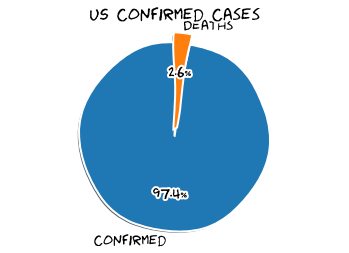

US Population
330362592
US Confirmed
8705340 (2.6350864809778463% of population)
US Deaths
225473

New York City Confirmed
258979 (3.106449379901226% of population)
New York City Deaths
23950

Philippines Confirmed
373144
Philippines Deaths
7053



In [11]:
# quick summary
us_details()

ny = us.loc[us['provinceState'] == 'New York']
nyc = ny.loc[(ny['admin2'] == 'Queens') | (ny['admin2'] == 'Kings') | (ny['admin2'] == 'New York') | (ny['admin2'] == 'Bronx') | (ny['admin2'] == 'Richmond')]
nyc_confirmed = nyc['confirmed'].sum()
nyc_deaths = nyc['deaths'].sum()
# from https://www.census.gov/quickfacts/newyorkcitynewyork
nyc_population = 8336817

nyc_confirmed_perc_of_pop = (nyc_confirmed/nyc_population) * 100
nyc_deaths_perc_of_confirmed = (nyc_deaths/nyc_confirmed) * 100

print('New York City Confirmed')
print('{0} ({1}% of population)'.format(nyc_confirmed, nyc_confirmed_perc_of_pop))
print('New York City Deaths')
print(nyc_deaths)
print('')

# create a dataframe of all comfirmed cases
global_confirmed = pd.DataFrame.from_dict(confirmed.json())

ph = global_confirmed.loc[global_confirmed['countryRegion'] == 'Philippines']
print('Philippines Confirmed')
print(ph['confirmed'].sum())
print('Philippines Deaths')
print(ph['deaths'].sum())
print('')

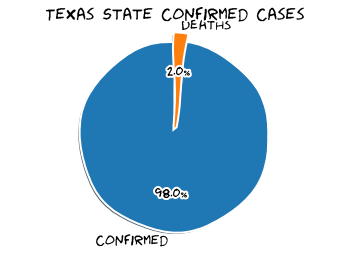

Texas State Total Population
28701845
Texas State Confirmed
898302 (3.1297709258760196% of population)
Texas State Deaths
17978 (2.001331400798395% of confirmed)



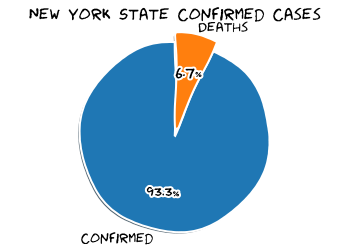

New York State Total Population
19542209
New York State Confirmed
496655 (2.5414475917231263% of population)
New York State Deaths
33405 (6.725996919390724% of confirmed)



In [12]:
state_details('Texas')
state_details('New York')

In [13]:
ny

,provinceState,countryRegion,lastUpdate,lat,long,confirmed,recovered,deaths,active,admin2,fips,combinedKey,incidentRate,peopleTested,peopleHospitalized,uid,iso3
8,New York,US,1603801480000,40.710881,-73.816847,76316,0,7292,69024,Queens,36081,"Queens, New York, US",3386.016333,None,None,84036081,USA
9,New York,US,1603801480000,40.636182,-73.949356,74703,0,7385,67318,Kings,36047,"Kings, New York, US",2918.196510,None,None,84036047,USA
15,New York,US,1603801480000,40.852093,-73.862828,55086,0,4986,50100,Bronx,36005,"Bronx, New York, US",3884.200261,None,None,84036005,USA
18,New York,US,1603801480000,40.740665,-73.589419,49377,0,2208,47169,Nassau,36059,"Nassau, New York, US",3638.892082,None,None,84036059,USA
19,New York,US,1603801480000,40.883201,-72.801217,48717,0,2019,46698,Suffolk,36103,"Suffolk, New York, US",3299.266356,None,None,84036103,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2782,New York,US,1603801480000,43.784416,-75.449040,115,0,0,115,Lewis,36049,"Lewis, New York, US",437.328871,None,None,84036049,USA
2783,New York,US,1603801480000,42.635055,-77.103699,115,0,7,108,Yates,36123,"Yates, New York, US",461.606390,None,None,84036123,USA
2806,New York,US,1603801480000,42.588317,-74.443390,109,0,0,109,Schoharie,36095,"Schoharie, New York, US",351.624246,None,None,84036095,USA
2919,New York,US,1603801480000,44.590409,-74.299260,80,0,0,80,Franklin,36033,"Franklin, New York, US",159.929631,None,None,84036033,USA


In [14]:
nyc

,provinceState,countryRegion,lastUpdate,lat,long,confirmed,recovered,deaths,active,admin2,fips,combinedKey,incidentRate,peopleTested,peopleHospitalized,uid,iso3
8,New York,US,1603801480000,40.710881,-73.816847,76316,0,7292,69024,Queens,36081,"Queens, New York, US",3386.016333,None,None,84036081,USA
9,New York,US,1603801480000,40.636182,-73.949356,74703,0,7385,67318,Kings,36047,"Kings, New York, US",2918.196510,None,None,84036047,USA
15,New York,US,1603801480000,40.852093,-73.862828,55086,0,4986,50100,Bronx,36005,"Bronx, New York, US",3884.200261,None,None,84036005,USA
29,New York,US,1603801480000,40.767273,-73.971526,35789,0,3193,32596,New York,36061,"New York, New York, US",2197.388602,None,None,84036061,USA
99,New York,US,1603801480000,40.585822,-74.148086,17085,0,1094,15991,Richmond,36085,"Richmond, New York, US",3588.207744,None,None,84036085,USA


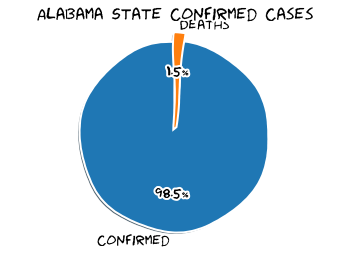

Alabama State Total Population
4887871
Alabama State Confirmed
185322 (3.791466673322598% of population)
Alabama State Deaths
2866 (1.54649744768565% of confirmed)



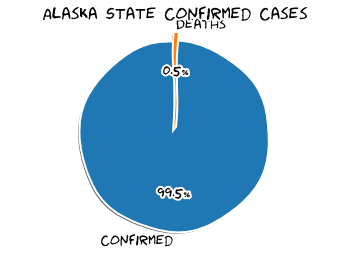

Alaska State Total Population
737438
Alaska State Confirmed
13356 (1.8111353090022482% of population)
Alaska State Deaths
68 (0.5091344713986223% of confirmed)



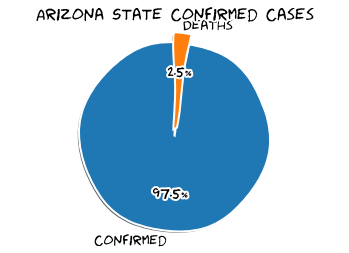

Arizona State Total Population
7171646
Arizona State Confirmed
238964 (3.332066306674925% of population)
Arizona State Deaths
5874 (2.458110845148223% of confirmed)



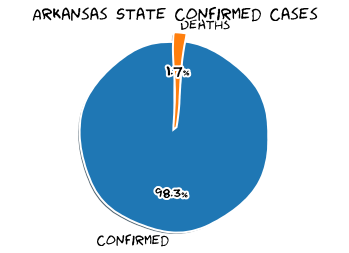

Arkansas State Total Population
3013825
Arkansas State Confirmed
106727 (3.5412474181480342% of population)
Arkansas State Deaths
1833 (1.7174660582607963% of confirmed)



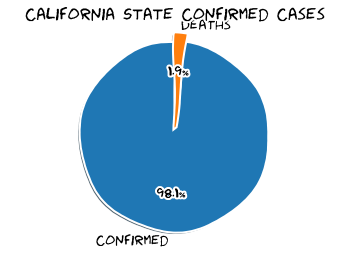

California State Total Population
39557045
California State Confirmed
911272 (2.303690783778212% of population)
California State Deaths
17400 (1.909418922122045% of confirmed)



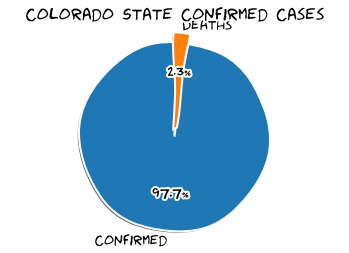

Colorado State Total Population
5695564
Colorado State Confirmed
97277 (1.7079432344189267% of population)
Colorado State Deaths
2226 (2.288310700371105% of confirmed)



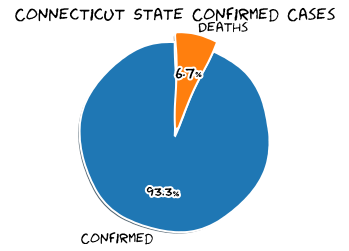

Connecticut State Total Population
3572665
Connecticut State Confirmed
68099 (1.906112103989599% of population)
Connecticut State Deaths
4589 (6.738718630229519% of confirmed)



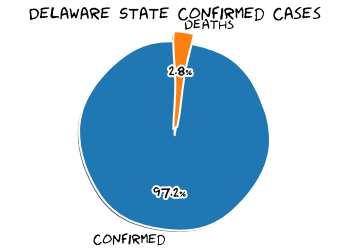

Delaware State Total Population
967171
Delaware State Confirmed
24168 (2.498834228900577% of population)
Delaware State Deaths
685 (2.8343263819927174% of confirmed)



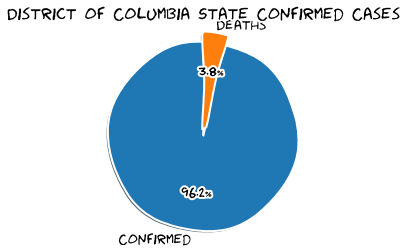

District of Columbia State Total Population
702455
District of Columbia State Confirmed
16812 (2.3933205685773467% of population)
District of Columbia State Deaths
642 (3.818700927908637% of confirmed)



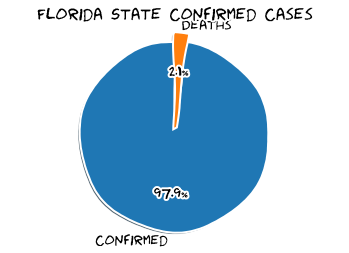

Florida State Total Population
21299325
Florida State Confirmed
782013 (3.6715388867957084% of population)
Florida State Deaths
16449 (2.1034177181197755% of confirmed)



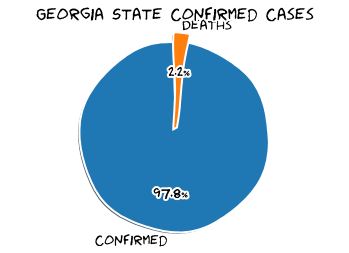

Georgia State Total Population
10519475
Georgia State Confirmed
351881 (3.345043360053615% of population)
Georgia State Deaths
7827 (2.2243315211676675% of confirmed)



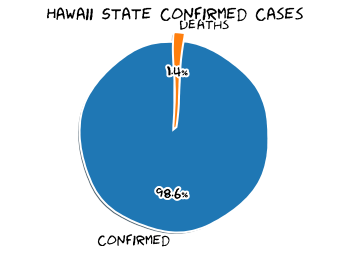

Hawaii State Total Population
1420491
Hawaii State Confirmed
14709 (1.0354870252609836% of population)
Hawaii State Deaths
212 (1.4412944455775376% of confirmed)



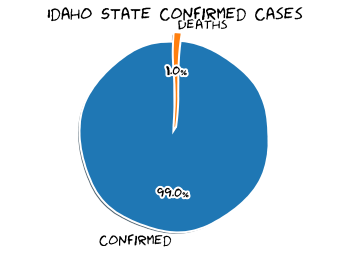

Idaho State Total Population
1754208
Idaho State Confirmed
60041 (3.422684197084952% of population)
Idaho State Deaths
580 (0.9660065621825087% of confirmed)



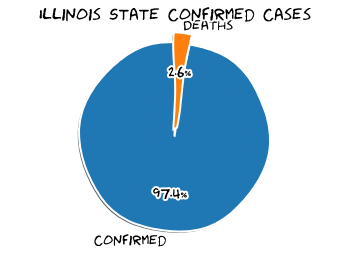

Illinois State Total Population
12741080
Illinois State Confirmed
383687 (3.0114166146040997% of population)
Illinois State Deaths
9792 (2.552080211213828% of confirmed)



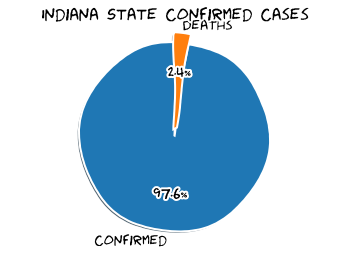

Indiana State Total Population
6691878
Indiana State Confirmed
164581 (2.4594142331943294% of population)
Indiana State Deaths
3907 (2.3739070731129353% of confirmed)



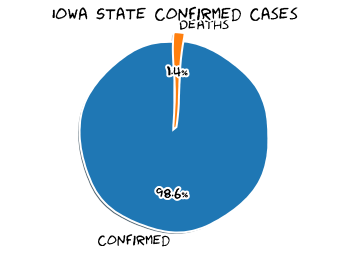

Iowa State Total Population
3156145
Iowa State Confirmed
117618 (3.7266348662688187% of population)
Iowa State Deaths
1657 (1.4087979730993556% of confirmed)



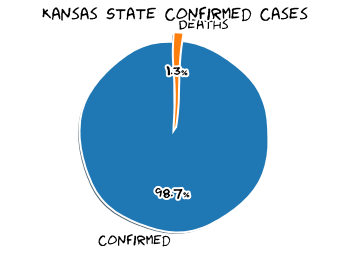

Kansas State Total Population
2911510
Kansas State Confirmed
76979 (2.643954511576467% of population)
Kansas State Deaths
969 (1.258784863404305% of confirmed)



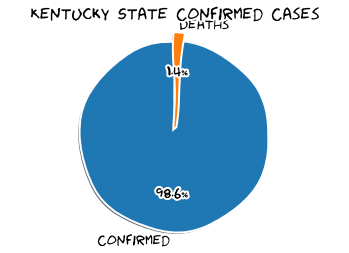

Kentucky State Total Population
4468402
Kentucky State Confirmed
97866 (2.1901789498796216% of population)
Kentucky State Deaths
1410 (1.4407455091655939% of confirmed)



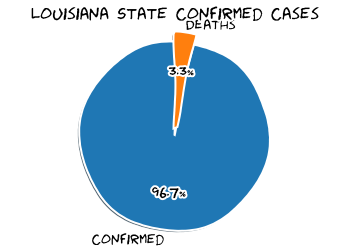

Louisiana State Total Population
4659978
Louisiana State Confirmed
180069 (3.864159873716142% of population)
Louisiana State Deaths
5854 (3.2509760147499014% of confirmed)



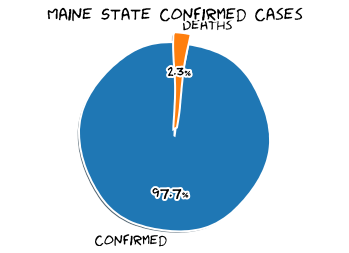

Maine State Total Population
1338404
Maine State Confirmed
6251 (0.4670488133627813% of population)
Maine State Deaths
146 (2.3356262997920334% of confirmed)



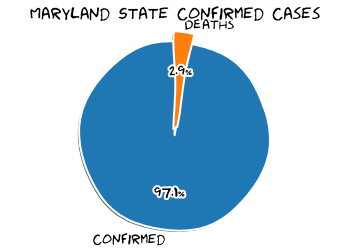

Maryland State Total Population
6042718
Maryland State Confirmed
140844 (2.3308054421867777% of population)
Maryland State Deaths
4089 (2.9032120644116897% of confirmed)



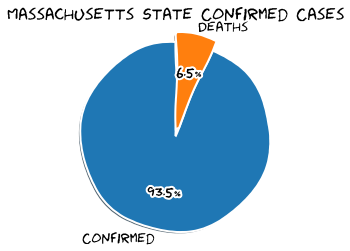

Massachusetts State Total Population
6902149
Massachusetts State Confirmed
151777 (2.198981795379961% of population)
Massachusetts State Deaths
9881 (6.510209056708197% of confirmed)



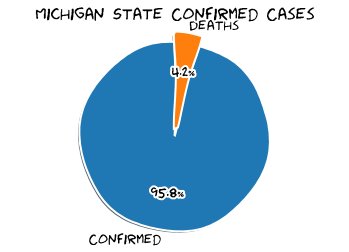

Michigan State Total Population
9995915
Michigan State Confirmed
179669 (1.7974242478052282% of population)
Michigan State Deaths
7552 (4.203284929509264% of confirmed)



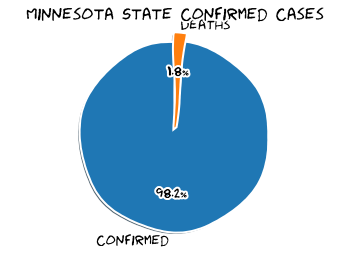

Minnesota State Total Population
5611179
Minnesota State Confirmed
135372 (2.412541107670955% of population)
Minnesota State Deaths
2406 (1.7773247052566263% of confirmed)



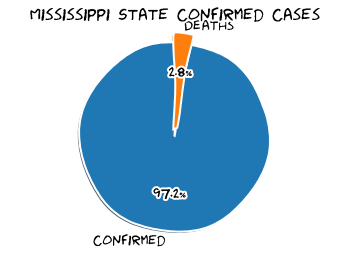

Mississippi State Total Population
2986530
Mississippi State Confirmed
115763 (3.8761706729883847% of population)
Mississippi State Deaths
3263 (2.818689909556594% of confirmed)



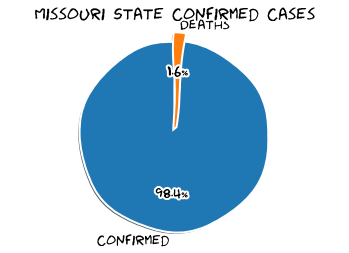

Missouri State Total Population
6126452
Missouri State Confirmed
173514 (2.8322102254290082% of population)
Missouri State Deaths
2816 (1.6229237986560163% of confirmed)



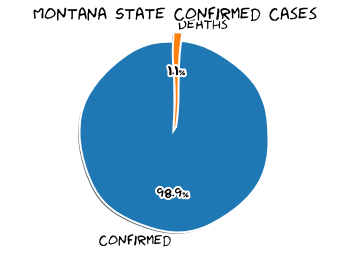

Montana State Total Population
1062305
Montana State Confirmed
28501 (2.682939457123896% of population)
Montana State Deaths
303 (1.0631205922599207% of confirmed)



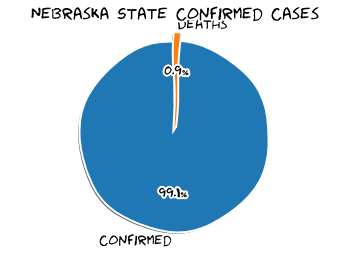

Nebraska State Total Population
1929268
Nebraska State Confirmed
64499 (3.343185083669039% of population)
Nebraska State Deaths
603 (0.9348982154762089% of confirmed)



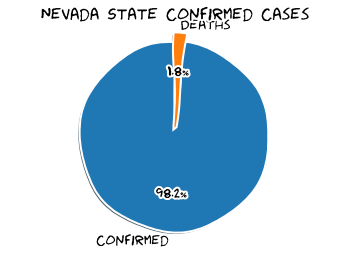

Nevada State Total Population
3034392
Nevada State Confirmed
96178 (3.169597072494259% of population)
Nevada State Deaths
1745 (1.814344236727734% of confirmed)



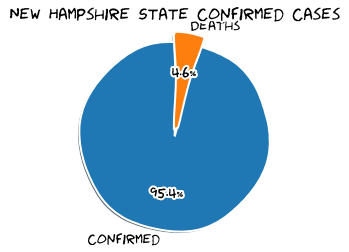

New Hampshire State Total Population
1356458
New Hampshire State Confirmed
10397 (0.7664815276256249% of population)
New Hampshire State Deaths
475 (4.568625565066846% of confirmed)



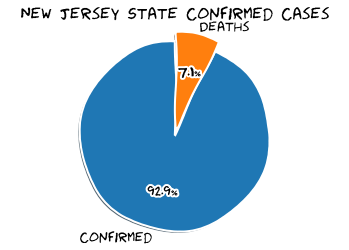

New Jersey State Total Population
8908520
New Jersey State Confirmed
229684 (2.5782509328148784% of population)
New Jersey State Deaths
16292 (7.093223733477299% of confirmed)



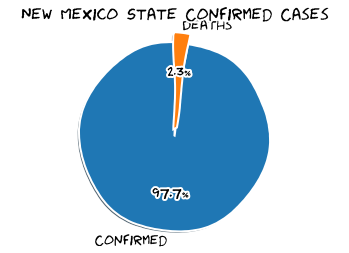

New Mexico State Total Population
2095428
New Mexico State Confirmed
42586 (2.0323294334140805% of population)
New Mexico State Deaths
976 (2.2918329967594984% of confirmed)



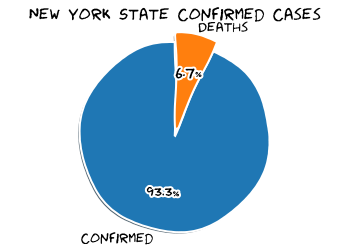

New York State Total Population
19542209
New York State Confirmed
496655 (2.5414475917231263% of population)
New York State Deaths
33405 (6.725996919390724% of confirmed)



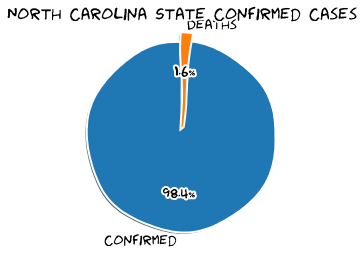

North Carolina State Total Population
10383620
North Carolina State Confirmed
261742 (2.5207201342113827% of population)
North Carolina State Deaths
4170 (1.59317190210207% of confirmed)



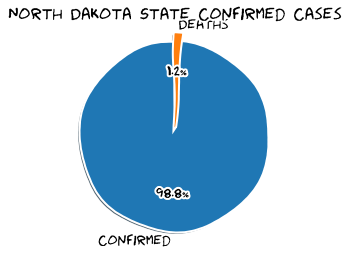

North Dakota State Total Population
760077
North Dakota State Confirmed
39130 (5.148162620366095% of population)
North Dakota State Deaths
476 (1.2164579606440071% of confirmed)



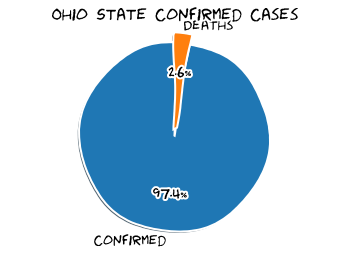

Ohio State Total Population
11689442
Ohio State Confirmed
200231 (1.7129217972936606% of population)
Ohio State Deaths
5217 (2.6054906582896753% of confirmed)



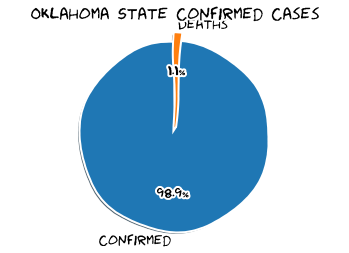

Oklahoma State Total Population
3943079
Oklahoma State Confirmed
117399 (2.9773433400649596% of population)
Oklahoma State Deaths
1251 (1.0655968108757314% of confirmed)



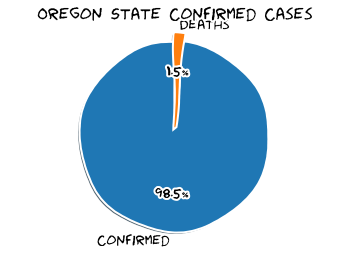

Oregon State Total Population
4190713
Oregon State Confirmed
42436 (1.0126200481875043% of population)
Oregon State Deaths
655 (1.5435008012065228% of confirmed)



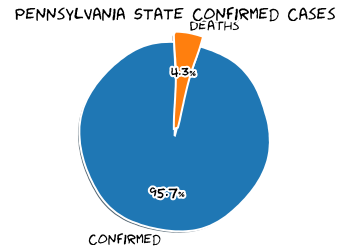

Pennsylvania State Total Population
12807060
Pennsylvania State Confirmed
201248 (1.57138328390747% of population)
Pennsylvania State Deaths
8659 (4.302651454921291% of confirmed)



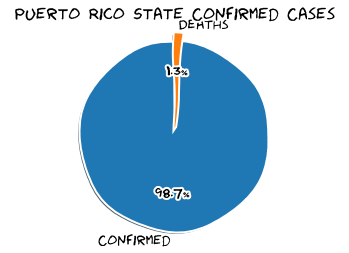

Puerto Rico State Total Population
3195153
Puerto Rico State Confirmed
63497 (1.9872913754051842% of population)
Puerto Rico State Deaths
808 (1.2725010630423483% of confirmed)



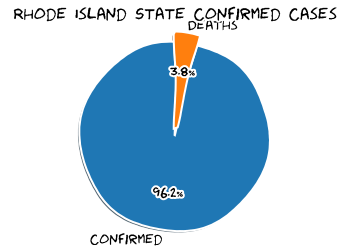

Rhode Island State Total Population
1057315
Rhode Island State Confirmed
31024 (2.9342248998642786% of population)
Rhode Island State Deaths
1184 (3.8164002062919034% of confirmed)



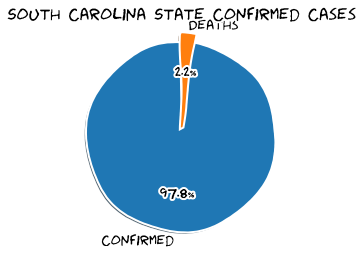

South Carolina State Total Population
5084127
South Carolina State Confirmed
171501 (3.3732634924343947% of population)
South Carolina State Deaths
3823 (2.2291415210406935% of confirmed)



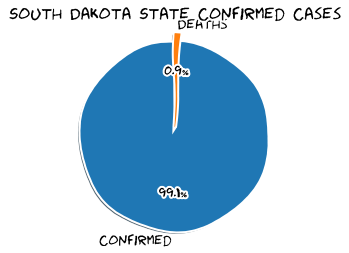

South Dakota State Total Population
882235
South Dakota State Confirmed
39741 (4.504582112475701% of population)
South Dakota State Deaths
375 (0.9436098739337209% of confirmed)



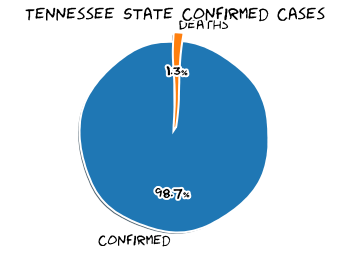

Tennessee State Total Population
6770010
Tennessee State Confirmed
249866 (3.6907774139181475% of population)
Tennessee State Deaths
3163 (1.2658785108818327% of confirmed)



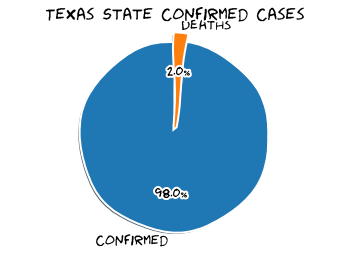

Texas State Total Population
28701845
Texas State Confirmed
898302 (3.1297709258760196% of population)
Texas State Deaths
17978 (2.001331400798395% of confirmed)



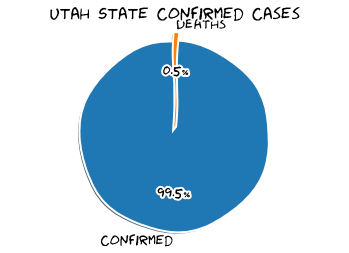

Utah State Total Population
3161105
Utah State Confirmed
106083 (3.3558834648010745% of population)
Utah State Deaths
574 (0.5410857536080239% of confirmed)



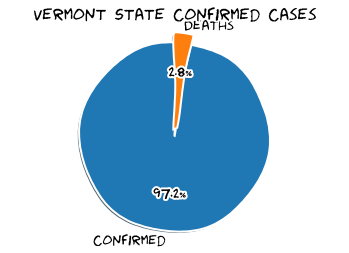

Vermont State Total Population
626299
Vermont State Confirmed
2083 (0.3325887475470981% of population)
Vermont State Deaths
58 (2.784445511281805% of confirmed)



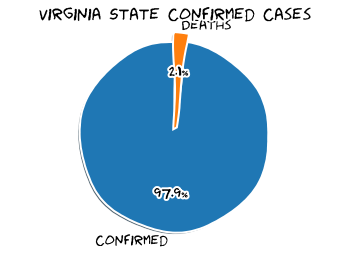

Virginia State Total Population
8517685
Virginia State Confirmed
173663 (2.038852105941931% of population)
Virginia State Deaths
3577 (2.0597363859889555% of confirmed)



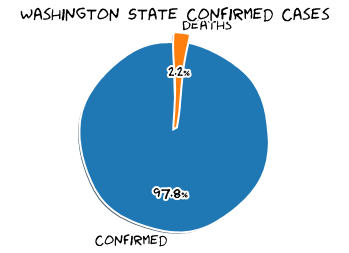

Washington State Total Population
7535591
Washington State Confirmed
103500 (1.3734821860687503% of population)
Washington State Deaths
2321 (2.242512077294686% of confirmed)



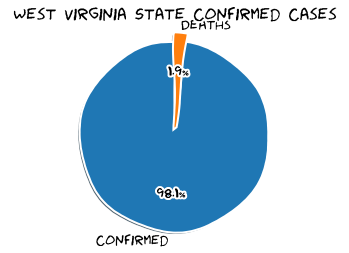

West Virginia State Total Population
1805832
West Virginia State Confirmed
22224 (1.2306792658453278% of population)
West Virginia State Deaths
426 (1.9168466522678185% of confirmed)



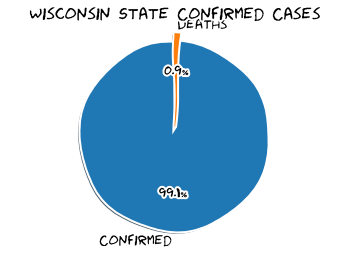

Wisconsin State Total Population
5813568
Wisconsin State Confirmed
201049 (3.458272097273138% of population)
Wisconsin State Deaths
1788 (0.8893354356400679% of confirmed)



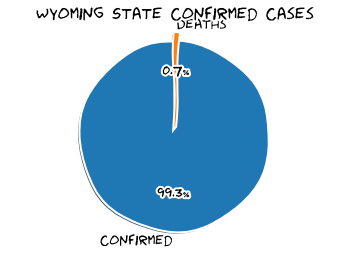

Wyoming State Total Population
577737
Wyoming State Confirmed
11477 (1.9865440503204748% of population)
Wyoming State Deaths
77 (0.6709070314542128% of confirmed)



In [15]:
for i in states:
    state_details(i)

In [16]:
# show api endpoints
api.json()

{'confirmed': {'detail': 'https://covid19.mathdro.id/api/confirmed',
  'value': 43587563},
 'countries': 'https://covid19.mathdro.id/api/countries',
 'countryDetail': {'example': 'https://covid19.mathdro.id/api/countries/USA',
  'pattern': 'https://covid19.mathdro.id/api/countries/[country]'},
 'dailySummary': 'https://covid19.mathdro.id/api/daily',
 'dailyTimeSeries': {'example': 'https://covid19.mathdro.id/api/daily/2-14-2020',
  'pattern': 'https://covid19.mathdro.id/api/daily/[dateString]'},
 'deaths': {'detail': 'https://covid19.mathdro.id/api/deaths',
  'value': 1160960},
 'image': 'https://covid19.mathdro.id/api/og',
 'lastUpdate': '2020-10-27T12:24:40.000Z',
 'recovered': {'detail': 'https://covid19.mathdro.id/api/recovered',
  'value': 29248581},
 'source': 'https://github.com/mathdroid/covid19'}

In [17]:
# get date
yesterday = today - timedelta(days=1)
date = yesterday.strftime('%m-%d-%Y').lstrip('0').replace(' 0', '')

In [18]:
# Get yesterday's data
r = request.get('https://covid19.mathdro.id/api/daily/{}'.format(date))
print(r)
j = r.json()
df = pd.DataFrame.from_dict(j)
df

<Response [200]>


,fips,admin2,provinceState,countryRegion,lastUpdate,lat,long,confirmed,deaths,recovered,active,combinedKey,incidenceRate,case-fatalityRatio
0,,,,Afghanistan,2020-10-27 04:24:45,33.93911,67.709953,40937,1518,34150,5269,Afghanistan,105.15988852440435,3.7081368932750323
1,,,,Albania,2020-10-27 04:24:45,41.1533,20.1683,19445,480,10705,8260,Albania,675.689763013413,2.4685008999742863
2,,,,Algeria,2020-10-27 04:24:45,28.0339,1.6596,56419,1922,39273,15224,Algeria,128.66056572474227,3.406653786844857
3,,,,Andorra,2020-10-27 04:24:45,42.5063,1.5218,4325,72,2957,1296,Andorra,5597.618585387951,1.6647398843930636
4,,,,Angola,2020-10-27 04:24:45,-11.2027,17.8739,9644,270,3530,5844,Angola,29.343155115755767,2.799668187474077
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3953,,,,West Bank and Gaza,2020-10-27 04:24:45,31.9522,35.2332,50952,454,44055,6443,West Bank and Gaza,998.781514779426,0.8910346993248548
3954,,,,Western Sahara,2020-10-27 04:24:45,24.2155,-12.8858,10,1,8,1,Western Sahara,1.674116485025028,10.0
3955,,,,Yemen,2020-10-27 04:24:45,15.552727,48.516388,2060,599,1360,101,Yemen,6.906733085745953,29.07766990291262
3956,,,,Zambia,2020-10-27 04:24:45,-13.133897,27.849332,16200,348,15445,407,Zambia,88.12031534453193,2.1481481481481484


In [19]:
# get all US confirmed cases
us = pd.DataFrame.from_dict(us_confirmed.json())
us

,provinceState,countryRegion,lastUpdate,lat,long,confirmed,recovered,deaths,active,admin2,fips,combinedKey,incidentRate,peopleTested,peopleHospitalized,uid,iso3
0,California,US,1603801480000,34.308284,-118.228241,300662,0,7000,293662,Los Angeles,06037,"Los Angeles, California, US",2994.907814,None,None,84006037,USA
1,Florida,US,1603801480000,25.611236,-80.551706,182523,0,3615,178908,Miami-Dade,12086,"Miami-Dade, Florida, US",6717.962119,None,None,84012086,USA
2,Illinois,US,1603801480000,41.841448,-87.816588,177465,0,5433,172032,Cook,17031,"Cook, Illinois, US",3445.766434,None,None,84017031,USA
3,Texas,US,1603801480000,29.858649,-95.393395,159272,0,2783,156489,Harris,48201,"Harris, Texas, US",3379.185607,None,None,84048201,USA
4,Arizona,US,1603801480000,33.348359,-112.491815,154722,0,3541,151181,Maricopa,04013,"Maricopa, Arizona, US",3449.447476,None,None,84004013,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3230,Texas,US,1603801480000,32.743640,-101.431651,2,0,0,2,Borden,48033,"Borden, Texas, US",305.810398,None,None,84048033,USA
3231,New Mexico,US,1603801480000,34.342745,-104.411784,1,0,0,1,De Baca,35011,"De Baca, New Mexico, US",57.208238,None,None,84035011,USA
3232,New Mexico,US,1603801480000,35.857516,-103.822094,1,0,0,1,Harding,35021,"Harding, New Mexico, US",160.000000,None,None,84035021,USA
3233,Oregon,US,1603801480000,44.726982,-120.028143,1,0,0,1,Wheeler,41069,"Wheeler, Oregon, US",75.075075,None,None,84041069,USA


In [20]:
# return only New York state
ny = us.loc[us['provinceState'] == 'New York']
ny

,provinceState,countryRegion,lastUpdate,lat,long,confirmed,recovered,deaths,active,admin2,fips,combinedKey,incidentRate,peopleTested,peopleHospitalized,uid,iso3
8,New York,US,1603801480000,40.710881,-73.816847,76316,0,7292,69024,Queens,36081,"Queens, New York, US",3386.016333,None,None,84036081,USA
9,New York,US,1603801480000,40.636182,-73.949356,74703,0,7385,67318,Kings,36047,"Kings, New York, US",2918.196510,None,None,84036047,USA
15,New York,US,1603801480000,40.852093,-73.862828,55086,0,4986,50100,Bronx,36005,"Bronx, New York, US",3884.200261,None,None,84036005,USA
18,New York,US,1603801480000,40.740665,-73.589419,49377,0,2208,47169,Nassau,36059,"Nassau, New York, US",3638.892082,None,None,84036059,USA
19,New York,US,1603801480000,40.883201,-72.801217,48717,0,2019,46698,Suffolk,36103,"Suffolk, New York, US",3299.266356,None,None,84036103,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2782,New York,US,1603801480000,43.784416,-75.449040,115,0,0,115,Lewis,36049,"Lewis, New York, US",437.328871,None,None,84036049,USA
2783,New York,US,1603801480000,42.635055,-77.103699,115,0,7,108,Yates,36123,"Yates, New York, US",461.606390,None,None,84036123,USA
2806,New York,US,1603801480000,42.588317,-74.443390,109,0,0,109,Schoharie,36095,"Schoharie, New York, US",351.624246,None,None,84036095,USA
2919,New York,US,1603801480000,44.590409,-74.299260,80,0,0,80,Franklin,36033,"Franklin, New York, US",159.929631,None,None,84036033,USA


In [21]:
ny_total_confirmed = ny['confirmed'].sum()
ny_total_confirmed

496655

In [22]:
# return only New York City
nyc = ny.loc[ny['admin2'] == 'New York City']
nyc

,provinceState,countryRegion,lastUpdate,lat,long,confirmed,recovered,deaths,active,admin2,fips,combinedKey,incidentRate,peopleTested,peopleHospitalized,uid,iso3


In [23]:
# show all Philippines confirmed
# ph = pd.DataFrame.from_dict(ph_confirmed.json())
ph = global_confirmed.loc[global_confirmed['countryRegion'] == 'Philippines']
ph


,provinceState,countryRegion,lastUpdate,lat,long,confirmed,recovered,deaths,active,admin2,fips,combinedKey,incidentRate,peopleTested,peopleHospitalized,uid,iso3,iso2
17,None,Philippines,1603801480000,12.879721,121.774017,373144,328602,7053,37489.0,None,None,Philippines,340.518621,None,None,608,PHL,PH


In [24]:
pop
pop.loc[pop['State'] == 'Texas']

,ID State,State,ID Year,Year,Population,Slug State
43,04000US48,Texas,2018,2018,28701845,texas
